# UFC WINNER PREDICTION

This is a UFC dataset which uses bets and odds to favour who will win a particular fight.
Although originally intended for predicting 'bets', I will be using this to predict who will win the fight.

The following notebook is divided into 3 parts:
1. Baseline model - Building a simple baseline model with basic modifications
2. Data Visualization - Using the power of visualization to gain a deeper insight into our data.
3. Feature Engineering and building the final model - After both the steps above are done, using feature engineering to strengthen our input and build a model more powerful than the baseline

Note: Originally the dataset is built for a **Regression** model, but I have used it to for the purpose of **Classification**.

In [1]:
#Import Cell
#used to import all the libraries and functions used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import sys, warnings, os
from sklearn.dummy import DummyClassifier

In [2]:
#To ignore max-iteration warnings while cross validating scores
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
#Setting columns and rows to display all the results
pd.set_option("display.max_columns", None, "display.max_rows", None)

In [4]:
#Reading the dataset
ufc_master_ds = pd.read_csv("../input/ultimate-ufc-dataset/ufc-master.csv")
#Seperating label from input
label = ufc_master_ds.Winner
#I have removed "B_Women's Featherweight_rank" because imputing with this feature in the dataset gives me a ton of errors in the baseline model.
X = ufc_master_ds.drop(['Winner',"B_Women's Featherweight_rank"], axis =1)

In [5]:
X.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Paul Felder,Rafael Dos Anjos,165,-200,165.000000,50.000000,11/14/2020,"Las Vegas, Nevada, USA",USA,False,Lightweight,MALE,5,2,0,0,3.47,0.45,0.6,1.82,0.39,5,11,86,4,0,0,10,4,4,0,18,Southpaw,172.72,177.80,155,1,0,0,3.67,0.43,0.2,0.25,0.25,3,5,38,0,0,2,2,4,1,0,9,Orthodox,180.34,177.80,155,36,36,1,0,2,9,6,48,4,0,3,-7.62,0.00,0,-0.20,0.4,1.57,1,1,12.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,Red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abdul Razak Alhassan,Khaos Williams,-240,185,41.666667,185.000000,11/14/2020,"Las Vegas, Nevada, USA",USA,False,Welterweight,MALE,3,0,1,0,22.22,0.58,0.0,0.00,0.00,1,0,1,0,0,0,0,1,0,0,1,Orthodox,182.88,195.58,170,1,0,0,4.54,0.48,0.0,0.73,0.28,3,2,10,0,0,0,0,4,0,0,4,Orthodox,177.80,185.42,170,35,26,-1,1,-2,-3,-2,-9,0,-3,0,5.08,10.16,-9,17.68,0.0,-0.73,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kay Hansen,Cory McKenna,-230,180,43.478261,180.000000,11/14/2020,"Las Vegas, Nevada, USA",USA,False,Women's Strawweight,FEMALE,3,0,1,0,3.13,0.49,0.0,1.00,1.00,1,0,3,0,0,0,1,0,0,0,1,Orthodox,160.02,147.32,115,0,1,0,2.49,0.56,1.2,2.41,0.18,1,0,3,0,0,0,0,0,1,0,1,Orthodox,157.48,160.02,115,21,21,0,0,0,0,0,0,0,0,-1,2.54,-12.70,0,0.64,-1.2,-1.41,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# 1. Creating a baseline model

 Since this is a classification task, the target value will be 'Winner'.

***Encoding categorical variables***

I'll be encoding the categorical columns prior to doing anything so it'll be easier for me to split the data while avoiding data leakage.

In [6]:
#Separating the features based on their data types
cat_col = [col for col in X.columns if X[col].dtypes == 'object']
num_col = [col for col in X.columns if col not in cat_col]

In [7]:
enc = LabelEncoder()
for i in X[cat_col]:
    #using astype(str) to avoid columns with 'float and str' to throw errors
    X[i] = enc.fit_transform(X[i].astype(str))

In [8]:
#Also encoding Label for Red to be 1 and Blue to be 0 
label = [1 if win == 'Red' else 0 for win in label]

Now that this is done, I can split the dataset into training and test set.

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, label, random_state = 2, test_size = 0.3)

***Finding and filling null values***

Building a baseline model would mean imputing all the null values with their 'means' (or mode/ median but I chose mean here) since this is a baseline model

In [10]:
X_train.isnull().sum().sort_values(ascending=False)

R_Women's Featherweight_rank    3127
B_Pound-for-Pound_rank          3118
B_Women's Flyweight_rank        3112
R_Women's Flyweight_rank        3100
B_Women's Strawweight_rank      3093
B_Welterweight_rank             3085
B_Lightweight_rank              3079
B_Women's Bantamweight_rank     3078
B_Bantamweight_rank             3075
B_Featherweight_rank            3073
B_Flyweight_rank                3071
B_Light Heavyweight_rank        3068
B_Middleweight_rank             3065
R_Women's Strawweight_rank      3060
B_Heavyweight_rank              3059
R_Women's Bantamweight_rank     3052
R_Welterweight_rank             3048
R_Lightweight_rank              3048
R_Middleweight_rank             3043
R_Flyweight_rank                3041
R_Featherweight_rank            3039
R_Light Heavyweight_rank        3039
R_Bantamweight_rank             3039
R_Heavyweight_rank              3037
R_Pound-for-Pound_rank          3030
B_match_weightclass_rank        2584
R_match_weightclass_rank        2272
R

Since, it is baseline model, imputation would be pretty basic and simple:
1. Impute the numerical columns with mean
2. Fill the categorical columns with 'most_frequent'

In [11]:
imp = SimpleImputer(strategy='most_frequent')
imp.fit(X_train[num_col])
X_train[num_col] = imp.transform(X_train[num_col])
X_valid[num_col] = imp.transform(X_valid[num_col])

In [12]:
cat_imp = SimpleImputer(strategy = 'most_frequent')
cat_imp.fit(X_train[cat_col])
X_train[cat_col] = cat_imp.transform(X_train[cat_col])
X_valid[cat_col] = cat_imp.transform(X_valid[cat_col])

In [13]:
X_train.sample(10)

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
4310,263,1245,-250,210,40.000000,210.000000,35,5,21,False,7,1,3,0,1,0,10.666667,0.511667,0.666667,0.500000,0.333333,1,4,7,0,0,0,0,0,2,0,2,1,185.42,193.04,185,0,1,0,22.000000,0.370000,1.000000,5.000000,0.710000,1,0,2,1,0,0,0,0,1,0,1,1,180.34,190.50,170,25,33,0,0,0,1,-4,5,-1,0,1,5.08,2.54,-8,-11.333333,-0.333333,-4.500000,0,1,9.0,0.0,5.0,0.0,0.0,0.0,2.0,4.0,13.0,6.0,5.0,10.0,8.0,7.0,7.0,6.0,9.0,7.0,9.0,12.0,8.0,12.0,5.0,9.0,9.0,12.0,14.0,2,5,2,3.0,74,681.0,0.0,1.0,60.0,36.0,165.0,103.0,0.36,0.34,69.0,44.0,174.0,111.0,2.0,1.0,4.0,3.0,0.5,0.33,1.0,0.0,2.0,1.0,0.0,0.0
4109,999,1383,-375,335,26.666667,335.000000,352,99,21,False,5,1,3,0,1,0,26.833333,0.531667,0.291667,2.250000,0.524583,6,9,59,10,0,2,3,7,2,1,15,1,190.50,187.96,205,0,2,0,22.916667,0.372500,0.000000,3.666667,0.394167,5,2,32,3,1,3,2,4,0,0,10,1,182.88,190.50,205,31,36,0,-1,1,5,-7,27,7,4,2,7.62,-2.54,-5,3.916667,0.291667,-1.416667,0,1,9.0,0.0,5.0,0.0,0.0,0.0,2.0,4.0,13.0,6.0,5.0,10.0,8.0,7.0,7.0,6.0,9.0,7.0,9.0,12.0,8.0,12.0,5.0,9.0,9.0,12.0,14.0,2,1,15,2.0,280,588.0,0.0,0.0,6.0,1.0,18.0,18.0,0.50,0.50,6.0,10.0,28.0,10.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3561,923,241,-145,135,68.965517,135.000000,166,83,3,False,7,1,3,0,3,0,48.142857,0.475714,0.428571,0.000000,0.000000,3,2,19,0,0,1,2,0,1,1,5,1,187.96,193.04,185,0,1,0,49.000000,0.437500,0.250000,1.250000,0.250000,2,1,12,0,0,0,2,0,1,0,3,2,182.88,187.96,185,34,26,0,2,1,2,-1,7,0,1,0,5.08,5.08,8,-0.857143,0.178571,-1.250000,0,1,9.0,0.0,5.0,0.0,0.0,0.0,2.0,4.0,13.0,6.0,5.0,10.0,8.0,7.0,7.0,6.0,9.0,7.0,9.0,12.0,8.0,12.0,5.0,9.0,9.0,12.0,14.0,2,4,31,3.0,292,900.0,0.0,0.0,86.0,64.0,225.0,247.0,0.38,0.25,86.0,67.0,225.0,250.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2582,661,1454,-105,-

***Building a baseline model***

In [14]:
#A DummyClassifier is used to be a baseline to compare a better model's performance later on
base_model = DummyClassifier(random_state=2)

In [15]:
base_model.fit(X_train,y_train)

DummyClassifier(random_state=2)

In [16]:
preds = base_model.predict(X_valid)
accuracy_score(y_valid, preds)

0.49850968703427717

49% is the accuracy for this model/ baseline accuracy

Now that the baseline model is built let's focus on building an actual model for our prediction

# 2. Data Visualization
Feature visualization on ufc_master_ds to gain some insight into our data 

In [17]:
ufc_master_ds.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Paul Felder,Rafael Dos Anjos,165,-200,165.000000,50.000000,11/14/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Lightweight,MALE,5,2,0,0,3.47,0.45,0.6,1.82,0.39,5,11,86,4,0,0,10,4,4,0,18,Southpaw,172.72,177.80,155,1,0,0,3.67,0.43,0.2,0.25,0.25,3,5,38,0,0,2,2,4,1,0,9,Orthodox,180.34,177.80,155,36,36,1,0,2,9,6,48,4,0,3,-7.62,0.00,0,-0.20,0.4,1.57,1,1,12.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,Red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abdul Razak Alhassan,Khaos Williams,-240,185,41.666667,185.000000,11/14/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Welterweight,MALE,3,0,1,0,22.22,0.58,0.0,0.00,0.00,1,0,1,0,0,0,0,1,0,0,1,Orthodox,182.88,195.58,170,1,0,0,4.54,0.48,0.0,0.73,0.28,3,2,10,0,0,0,0,4,0,0,4,Orthodox,177.80,185.42,170,35,26,-1,1,-2,-3,-2,-9,0,-3,0,5.08,10.16,-9,17.68,0.0,-0.73,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kay Hansen,Cory McKenna,-230,180,43.478261,180.000000,11/14/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Women's Strawweight,FEMALE,3,0,1,0,3.13,0.49,0.0,1.00,1.00,1,0,3,0,0,0,1,0,0,0,1,Orthodox,160.02,147.32,115,0,1,0,2.49,0.56,1.2,2.41,0.18,1,0,3,0,0,0,0,0,1,0,1,Orthodox,157.48,160.02,115,21,21,0,0,0,0,0,0,0,0,-1,2.54,-12.70,0,0.64,-1.2,-1.41,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [18]:
#Encoding label so it is easier to find correlation
ufc_master_ds['Winner'] = [1 if winner == 'Red' else 0 for winner in ufc_master_ds.Winner]

Now, let's see the correlation between variables and target and then select the appropriate variable to visualize

In [19]:
num_corr_col = [col for col in ufc_master_ds.columns if ufc_master_ds[col].dtype == 'int64' or ufc_master_ds[col].dtype == 'float64']
corr_dict = {}
#Getting absolute values of correlation since we would need to inspect negative correlation too
for col in num_corr_col:
    corr_dict[col] = abs(ufc_master_ds[col].corr(ufc_master_ds['Winner']))

In [20]:
for w in sorted(corr_dict, key=corr_dict.get):
    print(w, corr_dict[w])

B_Pound-for-Pound_rank 4.0438642413036e-18
B_avg_TD_pct 0.00012087014772744039
R_Welterweight_rank 0.00025674863303685514
B_win_by_Submission 0.001921970700803313
R_Pound-for-Pound_rank 0.0022287169288472074
R_draw 0.0022689430916459806
R_Weight_lbs 0.003057520088610938
R_Height_cms 0.0037943455887552947
B_avg_SUB_ATT 0.004167108124258807
R_win_by_Decision_Unanimous 0.0042820543616267845
B_longest_win_streak 0.005064693501448341
R_win_by_KO/TKO 0.005143504980737794
total_title_bout_dif 0.00654198940495853
R_win_by_Submission 0.007146079004340056
sub_dif 0.007394412534057697
R_wins 0.00863537589373594
B_win_by_TKO_Doctor_Stoppage 0.01008498554047256
R_rev_bout 0.01052663529382445
B_wins 0.011624583559467262
B_win_by_Decision_Majority 0.012640281159421701
empty_arena 0.013073493242466401
R_win_by_Decision_Majority 0.014170122345257273
B_win_by_KO/TKO 0.01506906024897687
R_Reach_cms 0.015153621330814706
B_win_by_Decision_Unanimous 0.016033821891185986
B_draw 0.016214935675339985
B_avg_SIG

The biggest contributors i.e. columns with a greater than 0.25 correlation (in increasing order of importance) are:
* B_td_landed_bout,
* R_td_pct_bout,
* B_sig_str_landed_bout,
* B_tot_str_landed_bout,
* R_tot_str_landed_bout,
* R_pass_bout,
* R_kd_bout,
* B_sig_str_pct_bout,
* B_pass_bout,
* B_ev,
* R_ev,
* R_odds,
* B_odds,
* R_sig_str_pct_bout,
* B_kd_bout

Since none of the bout variables have any information on them, I'll have to do some inspection and visualization and see if I can find out the meaning of these.

In [21]:
ufc_master_ds['B_kd_bout'].unique()

array([nan,  0.,  1.,  2.,  3.,  4.])

In [22]:
#Getting null values percentage
(ufc_master_ds['B_kd_bout'].isnull().sum()/ufc_master_ds.shape[0])*100

38.028169014084504

More than 38% of these values are null

In [23]:
#For visualization purposes
ufc_master_ds['Winner'] = ['Red' if winner == 1 else 'Blue' for winner in ufc_master_ds.Winner]

Let's see the countplot

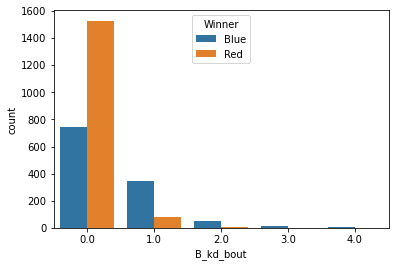

In [24]:
sns.countplot(x=ufc_master_ds['B_kd_bout'], hue = ufc_master_ds['Winner']);

A majority of these values belong to 0, then 1,2,3 with a rare appearance in 4. All belong to float64 type. Also, these are bout related.

According to the official UFC site, 'kd' refers to knockdown, so these could be knockdowns dealt to/by the blue player

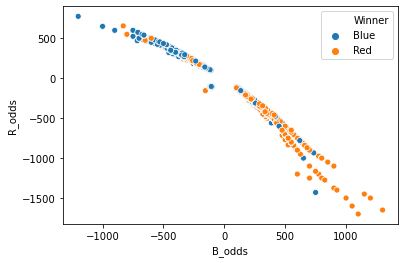

In [25]:
#Analysing "_odds" variables
sns.scatterplot(x="B_odds", y="R_odds", hue="Winner", data = ufc_master_ds);

As B_odds increase, there are more "Red" winners. Same for blue, so it seems that, with the exception of a few outliers, all of the winner are the ones that are bet against. These seem like odds to lose rather than odds to win

In [26]:
#Just to be sure
ufc_master_ds["Winner"].loc[ufc_master_ds["B_odds"]>1].value_counts()

Red     1906
Blue     846
Name: Winner, dtype: int64

These are the winner distributions where the odds of Blue player winning are greater than 0, but the winners are clearly Red players.
Same would be applicable for B_odds

In [27]:
#Null values in _sig_str_pct_bout variables
[(ufc_master_ds[col].isnull().sum()/ufc_master_ds.shape[0])*100 for col in ['R_sig_str_pct_bout','B_sig_str_pct_bout']]
#Same number of missing values as _kd_bout variables

[38.028169014084504, 38.028169014084504]

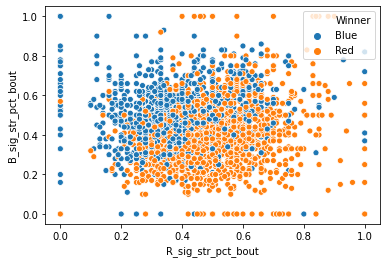

In [28]:
sns.scatterplot(x='R_sig_str_pct_bout',y='B_sig_str_pct_bout',hue = 'Winner', data=ufc_master_ds);

There does seem to be somewhat of a linear correlation in significant striking accuracy and winner of the bout

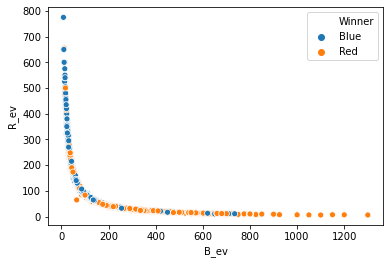

In [29]:
#Lets inspect _ev variables
sns.scatterplot(x='B_ev', y='R_ev',hue = 'Winner', data=ufc_master_ds);

When B_ev is increasing in value, the winners are Red and when R_ev is increasing, the winners are Blue.

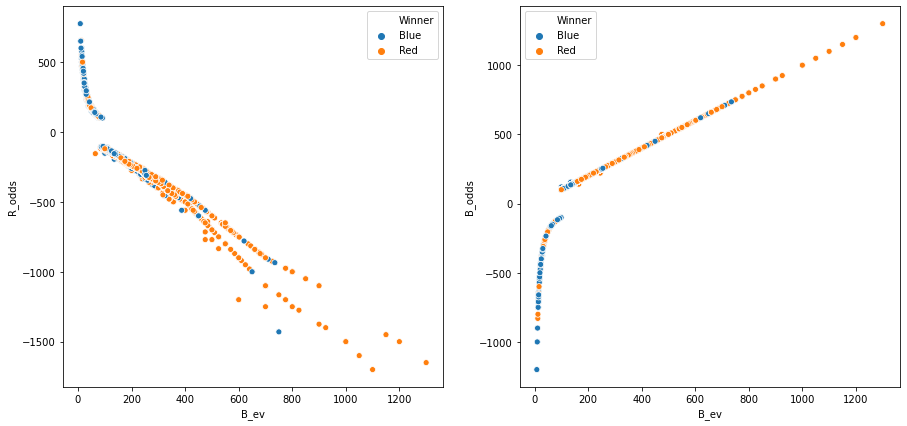

In [30]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.scatterplot(x='B_ev', y='R_odds',hue = 'Winner', data=ufc_master_ds, ax=ax[0]);
sns.scatterplot(x='B_ev', y='B_odds',hue = 'Winner', data=ufc_master_ds, ax=ax[1]);
fig.show()

As the chances of Red winning increases (i.e. R_odds decreases), the profit i.e. B_ev increases.
This indicates that B_ev is the profit on Red rather than blue and the other way round would be the same for R_ev

The _bout features would have more or less similar relationship with one another

Let's move to _Stance variables

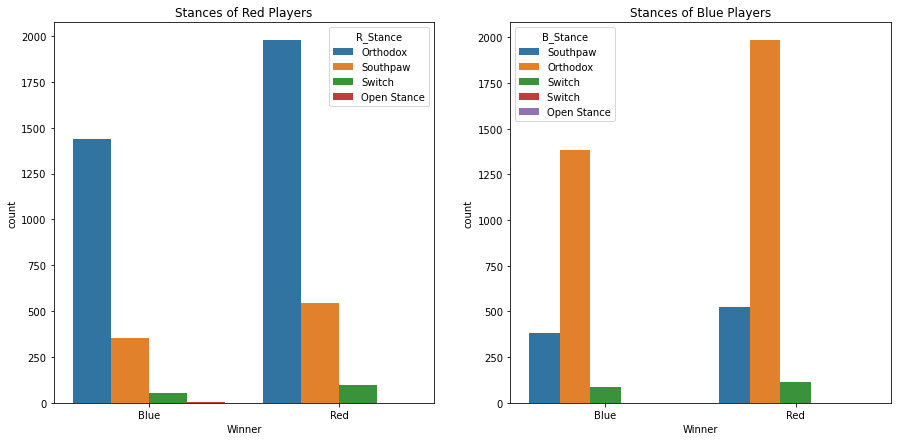

In [31]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
sns.countplot(ufc_master_ds['Winner'], hue = ufc_master_ds['R_Stance'], ax=ax[0])
sns.countplot(ufc_master_ds['Winner'], hue = ufc_master_ds['B_Stance'], ax=ax[1])
ax[0].title.set_text('Stances of Red Players')
ax[1].title.set_text('Stances of Blue Players')
fig.show()

Orthodox is the superior stance followed by Southpaw and then Switch

# 3. Feature Engineering, Filling null values and Final Model

In [32]:
ufc_master_ds.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,title_bout,weight_class,gender,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,B_avg_TD_pct,B_longest_win_streak,B_losses,B_total_rounds_fought,B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_landed,R_avg_TD_pct,R_longest_win_streak,R_losses,R_total_rounds_fought,R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,B_age,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,constant_1,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,finish,finish_details,finish_round,finish_round_time,total_fight_time_secs,R_kd_bout,B_kd_bout,R_sig_str_landed_bout,B_sig_str_landed_bout,R_sig_str_attempted_bout,B_sig_str_attempted_bout,R_sig_str_pct_bout,B_sig_str_pct_bout,R_tot_str_landed_bout,B_tot_str_landed_bout,R_tot_str_attempted_bout,B_tot_str_attempted_bout,R_td_landed_bout,B_td_landed_bout,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Paul Felder,Rafael Dos Anjos,165,-200,165.000000,50.000000,11/14/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Lightweight,MALE,5,2,0,0,3.47,0.45,0.6,1.82,0.39,5,11,86,4,0,0,10,4,4,0,18,Southpaw,172.72,177.80,155,1,0,0,3.67,0.43,0.2,0.25,0.25,3,5,38,0,0,2,2,4,1,0,9,Orthodox,180.34,177.80,155,36,36,1,0,2,9,6,48,4,0,3,-7.62,0.00,0,-0.20,0.4,1.57,1,1,12.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,Red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abdul Razak Alhassan,Khaos Williams,-240,185,41.666667,185.000000,11/14/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Welterweight,MALE,3,0,1,0,22.22,0.58,0.0,0.00,0.00,1,0,1,0,0,0,0,1,0,0,1,Orthodox,182.88,195.58,170,1,0,0,4.54,0.48,0.0,0.73,0.28,3,2,10,0,0,0,0,4,0,0,4,Orthodox,177.80,185.42,170,35,26,-1,1,-2,-3,-2,-9,0,-3,0,5.08,10.16,-9,17.68,0.0,-0.73,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kay Hansen,Cory McKenna,-230,180,43.478261,180.000000,11/14/2020,"Las Vegas, Nevada, USA",USA,Blue,False,Women's Strawweight,FEMALE,3,0,1,0,3.13,0.49,0.0,1.00,1.00,1,0,3,0,0,0,1,0,0,0,1,Orthodox,160.02,147.32,115,0,1,0,2.49,0.56,1.2,2.41,0.18,1,0,3,0,0,0,0,0,1,0,1,Orthodox,157.48,160.02,115,21,21,0,0,0,0,0,0,0,0,-1,2.54,-12.70,0,0.64,-1.2,-1.41,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neither,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Considering the number of variables, it would make sense to combine similar variables to increase their correlation and reduce complexity by limiting the input features

Some variables are already engineered. They have combined features, so I'll just be doing those that haven't yet been touched.
These are the already engineered features:
1. lose_streak_dif: (Blue lose streak) - (Red lose streak) 
2. winstreakdif: (Blue win streak) - (Red win streak)
3. longest_win_streak_dif: (Blue longest win streak) - (Red longest win streak)
4. win_dif: (Blue wins) - (Red wins)
5. loss_dif: (Blue losses) - (Red losses)
6. total_round_dif: (Blue total rounds fought) - (Red total rounds fought)
7. total_title_bout_dif: (Blue number of title fights) - (Red number of title fights)
8. ko_dif: (Blue wins by KO/TKO) - (Red wins by KO/TKO)
9. sub_dif: (Blue wins by submission) - (Red wins by submission)
10. height_dif: (Blue height) - (Red height) in cms
11. reach_dif: (Blue reach) - (Red reach) in cms
12. age_dif: (Blue age) - (Red age)
13. sig_str_dif: (Blue sig strikes per minute) - (Red sig strikes per minute)
14. avg_sub_att_dif: (Blue submission attempts) - (Red submission attempts)
15. avg_td_dif: (Blue TD attempts) - (Red TD attempts)

In [33]:
ufc_master_ds['draw_diff'] = (ufc_master_ds['B_draw']-ufc_master_ds['R_draw'])
ufc_master_ds['avg_sig_str_pct_diff'] = (ufc_master_ds['B_avg_SIG_STR_pct']-ufc_master_ds['R_avg_SIG_STR_pct'])
ufc_master_ds['avg_TD_pct_diff'] = (ufc_master_ds['B_avg_TD_pct']-ufc_master_ds['B_avg_TD_pct'])
ufc_master_ds['win_by_Decision_Majority_diff'] = (ufc_master_ds['B_win_by_Decision_Majority']-ufc_master_ds['R_win_by_Decision_Majority'])
ufc_master_ds['win_by_Decision_Split_diff'] = (ufc_master_ds['B_win_by_Decision_Split']-ufc_master_ds['R_win_by_Decision_Split'])
ufc_master_ds['win_by_Decision_Unanimous_diff'] = (ufc_master_ds['B_win_by_Decision_Unanimous']-ufc_master_ds['R_win_by_Decision_Unanimous'])
ufc_master_ds['win_by_TKO_Doctor_Stoppage_diff'] = (ufc_master_ds['B_win_by_TKO_Doctor_Stoppage']-ufc_master_ds['R_win_by_TKO_Doctor_Stoppage'])

In [34]:
ufc_master_ds['odds_diff'] = (ufc_master_ds['B_odds']-ufc_master_ds['R_odds'])
ufc_master_ds['ev_diff'] = (ufc_master_ds['B_ev']-ufc_master_ds['R_ev'])

ufc_master_ds['kd_bout_diff']=(ufc_master_ds['B_kd_bout']-ufc_master_ds['R_kd_bout'])
ufc_master_ds['sig_str_landed_bout_diff']=(ufc_master_ds['B_sig_str_landed_bout']-ufc_master_ds['R_sig_str_landed_bout'])
ufc_master_ds['sig_str_attempted_bout_diff']=(ufc_master_ds['B_sig_str_attempted_bout']-ufc_master_ds['R_sig_str_attempted_bout'])
ufc_master_ds['sig_str_attempted_bout_diff']=(ufc_master_ds['B_sig_str_attempted_bout']-ufc_master_ds['R_sig_str_attempted_bout'])
ufc_master_ds['sig_str_pct_bout_diff']=(ufc_master_ds['B_sig_str_pct_bout']-ufc_master_ds['R_sig_str_pct_bout'])
ufc_master_ds['tot_str_landed_bout_diff']=(ufc_master_ds['B_tot_str_landed_bout']-ufc_master_ds['R_tot_str_landed_bout'])
ufc_master_ds['tot_str_attempted_bout_diff']=(ufc_master_ds['B_tot_str_attempted_bout']-ufc_master_ds['R_tot_str_attempted_bout'])
ufc_master_ds['td_landed_bout_diff']=(ufc_master_ds['B_td_landed_bout']-ufc_master_ds['R_td_landed_bout'])
ufc_master_ds['td_attempted_bout_diff']=(ufc_master_ds['B_td_attempted_bout']-ufc_master_ds['R_td_attempted_bout'])
ufc_master_ds['td_pct_bout_diff']=(ufc_master_ds['B_td_pct_bout']-ufc_master_ds['R_td_pct_bout'])
ufc_master_ds['td_pct_bout_diff']=(ufc_master_ds['B_td_pct_bout']-ufc_master_ds['R_td_pct_bout'])
ufc_master_ds['sub_attempts_bout_diff']=(ufc_master_ds['B_sub_attempts_bout']-ufc_master_ds['R_sub_attempts_bout'])
ufc_master_ds['pass_bout_diff']=(ufc_master_ds['B_pass_bout']-ufc_master_ds['R_pass_bout'])
ufc_master_ds['rev_bout_diff']=(ufc_master_ds['B_rev_bout']-ufc_master_ds['R_rev_bout'])

After extracting the necessary information from these variables, there's no more need for them. So, I'll just drop them

In [35]:
#Dropping variables
var_drop = [
'B_odds',
'R_odds',
'B_ev',
'R_ev',
'R_kd_bout',
'B_kd_bout',
'R_sig_str_landed_bout',
'B_sig_str_landed_bout',
'R_sig_str_attempted_bout',
'B_sig_str_attempted_bout',
'R_sig_str_pct_bout',
'B_sig_str_pct_bout',
'R_tot_str_landed_bout',
'B_tot_str_landed_bout',
'R_tot_str_attempted_bout',
'B_tot_str_attempted_bout',
'R_td_landed_bout',
'B_td_landed_bout',
'R_td_attempted_bout',
'B_td_attempted_bout',
'R_td_pct_bout',
'B_td_pct_bout',
'R_sub_attempts_bout',
'B_sub_attempts_bout',
'R_pass_bout',
'B_pass_bout',
'R_rev_bout',
'B_rev_bout',
'B_current_lose_streak', 'R_current_lose_streak',
'B_current_win_streak', 'R_current_win_streak',
'B_longest_win_streak', 'R_longest_win_streak',
'B_wins', 'R_wins',
'B_losses', 'R_losses',
'B_total_rounds_fought', 'R_total_rounds_fought',
'B_total_title_bouts', 'R_total_title_bouts',
'B_win_by_KO/TKO', 'R_win_by_KO/TKO',
'B_win_by_Submission', 'R_win_by_Submission',
'B_Height_cms', 'R_Height_cms',
'B_Reach_cms', 'R_Reach_cms',
'B_age', 'R_age',
'B_avg_SIG_STR_landed', 'R_avg_SIG_STR_landed',
'B_avg_SUB_ATT', 'R_avg_SUB_ATT',
'B_avg_TD_landed', 'R_avg_TD_landed',
'B_draw','B_avg_SIG_STR_pct','B_avg_TD_pct','B_win_by_Decision_Majority','B_win_by_Decision_Split','B_win_by_Decision_Unanimous','B_win_by_TKO_Doctor_Stoppage',
'R_draw','R_avg_SIG_STR_pct','R_avg_TD_pct','R_win_by_Decision_Majority','R_win_by_Decision_Split','R_win_by_Decision_Unanimous','R_win_by_TKO_Doctor_Stoppage']
ufc_master_ds.drop(var_drop, axis=1, inplace = True)

Next step will be dropping the variables that are common to both the fighters(like date, country, etc.) and thus provide no advantage to anyone

In [36]:
comm_drop = [
'date','location','country','weight_class','gender','no_of_rounds','empty_arena','constant_1','finish','finish_details','finish_round','finish_round_time','total_fight_time_secs','B_Weight_lbs','R_Weight_lbs'
]
ufc_master_ds.drop(comm_drop, axis=1, inplace = True)

Before moving on to the rank variables, the _Stance variables need some encoding. I'll encode them as I visualized them above.i.e. Orthodox is superior so it will be 4, Southpaw after that will be 3, Switch, 2, and Open Stance 1

In [37]:
ufc_master_ds.B_Stance.unique()

array(['Southpaw', 'Orthodox', 'Switch', 'Switch ', 'Open Stance'],
      dtype=object)

In [38]:
#It has one spelling mistake
ufc_master_ds['B_Stance'].loc[ufc_master_ds['B_Stance']=='Switch '] = 'Switch'
#R_Stance doesn't have this error, so we're cool

In [39]:
stance = ['B_Stance', 'R_Stance']

In [40]:
for x in stance:
    ufc_master_ds[x] = [4 if st == 'Orthodox'
                           else 3 if st == 'Southpaw'
                           else 2 if st == 'Switch'
                           else 1 for st in ufc_master_ds[x]]
#using -1 and 1 for both red and blue so there is no misunderstanding that one variable is better than the other    
ufc_master_ds['better_rank'] = [-1 if rank == 'Red'
                               else 1 if rank == 'Blue'
                               else 0 for rank in ufc_master_ds['better_rank']]

ufc_master_ds['title_bout'] = [1 if tb==True else 0 for tb in ufc_master_ds['title_bout']]

In [41]:
ufc_master_ds['Stance_diff'] = (ufc_master_ds['B_Stance'] - ufc_master_ds['R_Stance'])
ufc_master_ds.drop(stance, axis = 1, inplace = True)

In [42]:
ufc_master_ds.head()

,R_fighter,B_fighter,Winner,title_bout,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,B_match_weightclass_rank,R_match_weightclass_rank,R_Women's Flyweight_rank,R_Women's Featherweight_rank,R_Women's Strawweight_rank,R_Women's Bantamweight_rank,R_Heavyweight_rank,R_Light Heavyweight_rank,R_Middleweight_rank,R_Welterweight_rank,R_Lightweight_rank,R_Featherweight_rank,R_Bantamweight_rank,R_Flyweight_rank,R_Pound-for-Pound_rank,B_Women's Flyweight_rank,B_Women's Featherweight_rank,B_Women's Strawweight_rank,B_Women's Bantamweight_rank,B_Heavyweight_rank,B_Light Heavyweight_rank,B_Middleweight_rank,B_Welterweight_rank,B_Lightweight_rank,B_Featherweight_rank,B_Bantamweight_rank,B_Flyweight_rank,B_Pound-for-Pound_rank,better_rank,draw_diff,avg_sig_str_pct_diff,avg_TD_pct_diff,win_by_Decision_Majority_diff,win_by_Decision_Split_diff,win_by_Decision_Unanimous_diff,win_by_TKO_Doctor_Stoppage_diff,odds_diff,ev_diff,kd_bout_diff,sig_str_landed_bout_diff,sig_str_attempted_bout_diff,sig_str_pct_bout_diff,tot_str_landed_bout_diff,tot_str_attempted_bout_diff,td_landed_bout_diff,td_attempted_bout_diff,td_pct_bout_diff,sub_attempts_bout_diff,pass_bout_diff,rev_bout_diff,Stance_diff
0,Paul Felder,Rafael Dos Anjos,Blue,0,1,0,2,9,6,48,4,0,3,-7.62,0.00,0,-0.20,0.4,1.57,12.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,-1,0,0.02,0.0,0,-2,8,0,-365,-115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,Abdul Razak Alhassan,Khaos Williams,Blue,0,-1,1,-2,-3,-2,-9,0,-3,0,5.08,10.16,-9,17.68,0.0,-0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.10,0.0,0,0,0,0,425,143.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Kay Hansen,Cory McKenna,Blue,0,0,0,0,0,0,0,0,0,-1,2.54,-12.70,0,0.64,-1.2,-1.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-0.07,0.0,0,0,1,0,410,136.521739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Brendan Allen,Sean Strickland,Blue,0,0,-2,-1,4,3,21,0,1,-1,-2.54,2.54,5,1.97,-2.0,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-0.24,0.0,0,2,2,0,12,9.593860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Ashley Yoder,Miranda Granger,Red,0,-1,0,-1,-1,-4,-17,0,0,0,0.00,-2.54,-5,0.51,-0.4,-1.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.03,0.0,0,-1,0,0,-302,-75.119760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [43]:
#Encoding label so it is easier to find correlation
ufc_master_ds['Winner'] = [1 if winner == 'Red' else 0 for winner in ufc_master_ds.Winner]

In [44]:
ufc_master_ds.loc[:,'B_match_weightclass_rank':'better_rank'].isnull().sum()

B_match_weightclass_rank        3684
R_match_weightclass_rank        3268
R_Women's Flyweight_rank        4431
R_Women's Featherweight_rank    4467
R_Women's Strawweight_rank      4378
R_Women's Bantamweight_rank     4364
R_Heavyweight_rank              4342
R_Light Heavyweight_rank        4345
R_Middleweight_rank             4354
R_Welterweight_rank             4343
R_Lightweight_rank              4347
R_Featherweight_rank            4349
R_Bantamweight_rank             4348
R_Flyweight_rank                4343
R_Pound-for-Pound_rank          4328
B_Women's Flyweight_rank        4443
B_Women's Featherweight_rank    4473
B_Women's Strawweight_rank      4419
B_Women's Bantamweight_rank     4399
B_Heavyweight_rank              4373
B_Light Heavyweight_rank        4388
B_Middleweight_rank             4384
B_Welterweight_rank             4392
B_Lightweight_rank              4392
B_Featherweight_rank            4390
B_Bantamweight_rank             4395
B_Flyweight_rank                4386
B

Almost all of _rank variables except better_rank are empty. I'll keep it and remove the rest

In [45]:
ufc_master_ds.drop(ufc_master_ds.loc[:,'B_match_weightclass_rank':'B_Pound-for-Pound_rank'], axis=1, inplace = True)

In [46]:
ufc_master_ds.sample(10)

,R_fighter,B_fighter,Winner,title_bout,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,total_round_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,better_rank,draw_diff,avg_sig_str_pct_diff,avg_TD_pct_diff,win_by_Decision_Majority_diff,win_by_Decision_Split_diff,win_by_Decision_Unanimous_diff,win_by_TKO_Doctor_Stoppage_diff,odds_diff,ev_diff,kd_bout_diff,sig_str_landed_bout_diff,sig_str_attempted_bout_diff,sig_str_pct_bout_diff,tot_str_landed_bout_diff,tot_str_attempted_bout_diff,td_landed_bout_diff,td_attempted_bout_diff,td_pct_bout_diff,sub_attempts_bout_diff,pass_bout_diff,rev_bout_diff,Stance_diff
1720,Cynthia Calvillo,Pearl Gonzalez,1,0,0,-1,-1,-1,0,-1,0,0,-1,0.00,10.16,-1,-13.000000,-3.000000,-1.000000,0,0,NaN,NaN,0,0,0,0,520,204.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3668,Mauricio Rua,Alexander Gustafsson,0,0,0,4,3,1,3,-15,-3,-2,2,10.16,7.62,6,-21.333333,0.380952,-1.095238,0,0,-0.201429,0.0,0,0,1,0,-520,-204.285714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4450,Gerald Harris,Mario Miranda,1,0,0,-1,-1,-1,0,-3,0,-1,0,10.16,-7.62,0,-21.000000,0.000000,-1.000000,0,0,NaN,NaN,0,0,0,0,290,70.483871,-1.0,-1.0,3.0,-0.05,16.0,26.0,0.0,0.0,0.00,0.0,0.0,0.0,1
2415,Chris Cariaso,Sergio Pettis,0,0,1,0,-1,-4,3,-20,-1,-1,0,7.62,15.24,12,14.033333,0.500000,-0.033333,-1,0,-0.010333,0.0,0,-2,-1,0,-370,-120.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1742,Mauricio Rua,Gian Villante,1,0,0,-1,0,-3,4,-19,-3,-2,0,5.08,0.00,4,6.944444,-0.250000,-0.631944,-1,0,-0.028611,0.0,0,0,-1,0,290,70.483871,-2.0,-39.0,-22.0,-0.18,-39.0,-23.0,-2.0,-2.0,-0.66,0.0,0.0,0.0,0
2940,Francis Carmont,Thales Leites,0,0,2,3,-1,2,-1,5,1,1,1,-5.08,0.00,0,-4.022727,0.556818,0.465909,-1,0,-0.055568,0.0,0,0,0,0,400,142.380952,1.0,0.0,-8.0,0.06,1.0,-7.0,0.0,0.0,0.00,0.0,0.0,0.0,0
2498,Daniel Omielanczuk,Chris de la Rocha,1,0,2,0,-1,-1,2,-9,0,-1,0,7.62,15.24,-4,-31.666667,-0.333333,-1.000000,0,0,NaN,NaN,0,0,0,0,250,43.076923,-1.0,-14.0,-8.0,0.05,-14.0,-8.0,0.0,0.0,0.00,0.0,0.0,0.0,1
3624,Simeon Thoresen,David Mitchell,0,0,-1,0,-1,-1,-1,3,0,0,-1,-2.54,-7.62,-5,-9.000000,1.500000,0.500000,0,0,0.025000,0.0,0,0,0,0,440,166.521739,0.0,11.0,44.0,-0.05,69.0,115.0,0.0,1.0,-0.50,2.0,0.0,1.0,0
1356,Stipe Miocic,Francis Ngannou,1,1,0,1,1,-5,2,-21,-3,-3,1,0.00,7.62,4,-34.153846,0.166667,-1.307692,-1,0,0.043590,0.0,0,0,-3,1,-320,-91.176471,0.0,-49.0,18.0,-0.55,-167.0,-118.0,-6.0,-13.0,-0.42,1.0,-4.0,0.0,0
745,Mitch Gagnon,Cole Smith,0,0,2,0,-4,-4,3,-15,0,0,-3,15.24,5.08,4,-28.571429,-1.142857,-0.857143,0,0,-0.131429,NaN,0,0,-1,0,220,16.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [47]:
label = ufc_master_ds.Winner
ufc_master_ds.drop(['Winner'], axis=1, inplace = True)

In [48]:
#Encoding the remaining categorical variables
cat_col = ['R_fighter', 'B_fighter']
enc = LabelEncoder()
for i in ufc_master_ds[cat_col]:
    ufc_master_ds[i] = enc.fit_transform(ufc_master_ds[i])

***Splitting the data in training and testing data set***

In [49]:
X_train, X_valid, y_train, y_valid = train_test_split(ufc_master_ds, label, test_size = 0.3, random_state=2)

In [50]:
#At this point all the null values are the ones that have been left empty by error/mistake and are not left empty deliberately.
#So, it would make sense to fill in these with mean rather than 0 or anything else
impute = SimpleImputer(strategy = 'mean')
impute.fit(X_train)
X_train = impute.transform(X_train)
X_valid = impute.transform(X_valid)

In [51]:
RF_model = RandomForestClassifier(random_state=2)

In [52]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [53]:
preds = RF_model.predict(X_valid)
accuracy_score(y_valid, preds)

0.7734724292101341

**77% is the accuracy after feature engineering**

In [54]:
#Built a model after doing GridSearch but not putting the code here because the cell takes up a lot of time
RF_model = RandomForestClassifier(n_estimators = 350, max_depth = 12, random_state = 2)

In [55]:
RF_model.fit(X_train, y_train)
preds = RF_model.predict(X_valid)
accuracy_score(y_valid, preds)

0.7794336810730254

**77.9% which is almost 78% accuracy**

So, after careful feature engineering and data visualization, the accuracy of our model increased by almost 30%.

Note : It should be considered that the model used as a baseline was a DummyClassifier and not a proper model.
